 <h1 align="center">Communicate Data Findings</h1>
 <h3 align="center">Important Factors that impact the loan for an applicant.</h3> 

## Data Source
- Dataset Name: prosperLoanData.csv
- Source: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv
- Dataset Description: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others.

### Dataset Cleaning:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Reading file
df=pd.read_csv("prosperLoanData.csv")
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
#renaming columns
df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory_Numeric','ProsperRating (Alpha)': 'ProsperRating_Alpha', 'ProsperRating (numeric)': 'ProsperRating_Numeric','TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percentage'}, inplace=True)

In [7]:
# Selecting useful columns for my analysis
column = ['ListingNumber' ,'LoanStatus','EstimatedEffectiveYield' ,  'BorrowerAPR' , 'BorrowerRate' ,'ProsperRating_Numeric',
          'ProsperRating_Alpha','ProsperScore', 'EmploymentStatus','Occupation','EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment','Recommendations', 'DebtToIncomeRatio',
          'LoanOriginalAmount' ,'PercentFunded','IncomeRange', 'Investors','BorrowerState']

In [8]:
df_raw=df[column]
df_raw.head(3)
loan=df_raw.dropna()

In [9]:
loan_df= loan[loan['IncomeRange'] != 'Not employed']

## Summary of Exploratory Data

### 1. Univariate Exploration
<li>Loan status of maximum people is "current".</li>
    <li>Loan amount is usually between 0-15000. Maximum no. of people have loan amount in the range (approx) 4000-7500.</li>
    <li> The borrower percentage rate varies most commonly between 0.12 -036. The most common rate being 0.35-0.36.</li>
    <li> Frequent value Borrower Debt to Income Ratio lies in 0.1-0.3.</li>
    <li> The borrowers interest rate varies mostly between 0.7-0.32</li>
    <li> The borrowers are almost equally distributed, having both high as well as low risk borrowers.</li>
    <li> The common prosper ratings are C,B and A respectively which is quite good. But HR also has reasonable number which cannot be ignored</li>
    

<li>The most common prosper rating is 4. But even borrowers with rating 1 are present.</li>
    <li>Most of the people who took loans are employed.</li>
    <li>More people are houseowners.</li>
    <li>Most of the borrowers have income in the range 50,000-74,999 and 25,000-49,999 respectively</li>
    <li>Monthly Income is right skewed. The common range is 1000-7000 approximately.</li>
    <li>Monthly loan payment is right skewed,common range lies in 0-400.</li>


### 2. Bivariate Exploration

<li>Postitive correlation is between Loanoriginalamount and monthlyloanpayment.Negative correaltion is between borrowerrate and loanoriginalamount, borrowerrate and prosper score.
    Borrowers with high prosper score get loan at lower annual percentage rate.Also loans of lesser amount is given at low annual percentage rate. </li>
<li>Borrower Interest Rate and Prosper score are inversely related to each other</li>
<li>Loan Amount and Borrower Interest Rate are negatively correlated.</li>
<li>Self employed have least prosper rating with some outliners present. Full time, part time and retired have high prosper rating. So full time employees get loan at a lesser rate as compared to others.Self-employed have to pay a high annual rate.Also full time employees gets loan easily whereas self-employed do not get loan easily.</li>
<li>Prosper score affects the loan original amount.People with less prosper score have lesser loan amount than people with higher prosper score. Therefore it's easier to get high amount loan with higher prosper score</li>
<li>People with income range 75,000-99,999 and 100,000+ have high prosper score.
People with income > 75,000 get loan easily. </li>
<li>Therefore people with higher income have higher prosper score and thereby they get high amount loans at a lower borrowerARP.



### 3. Multivariate Exploration
<ul>
<li>High prosper rating has lesser Borrower rate and lesser borrower ARP.So borrowers with high prosper rating get loans at a lesser rate and borrowerAPR</li>
<li>Income range 100,000 + take loans with high original amount and have most common loan status as current.</li>
<li>Income range 1-24,9999 takes low amount loans.Income Range 50,000-74,999 have most number of past due(>120 days) as status.Income range 1-24,999 has large number of prosper rating as HR compared to the total borrowers in that range.So employees having income in this range have lesser chance of getting loans of high amount.</li>
    
<li>Employees with status 'Employed' and 'self-employed' take loans of larger amount.
Employess with less income take loans of lesser total amount(Around 3000-5000) and their prosper score i lesser than others therefore it's not easy for them to get high loan.</li>
    </ul>

## Explanatory Data Visualization

### Question : What is the impact of prosper score on Income Range?

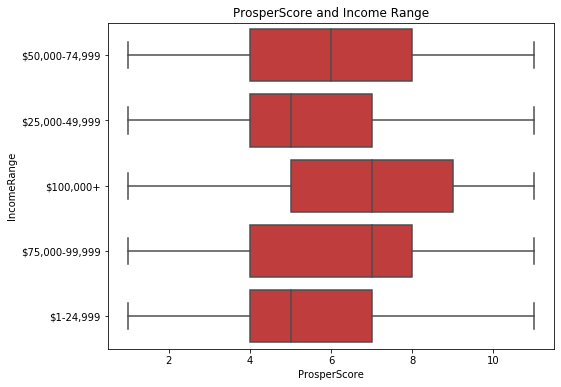

In [10]:
plt.figure(figsize = [8, 6])
base_color = sns.color_palette()[3]
sns.boxplot(data = loan_df, x = 'ProsperScore', y = 'IncomeRange', color = base_color);
plt.title('ProsperScore and Income Range');

#### Conclusion:
- Higher income earning borrowers have high propsper score and thereby they can get loan easily, whereas borrowers having income <=49,999 have low prosper score and do not get loan easily.

### Question : Does prosper rating have any effect on Borrower Interest Rate and Borrower APR(Annual Percentage Rate)?

In [11]:
loan[["ProsperScore","BorrowerRate"]].corr()

,ProsperScore,BorrowerRate
ProsperScore,1.00000,-0.65832
BorrowerRate,-0.65832,1.00000


In [12]:
loan[["ProsperScore","BorrowerAPR"]].corr()

,ProsperScore,BorrowerAPR
ProsperScore,1.000000,-0.675986
BorrowerAPR,-0.675986,1.000000


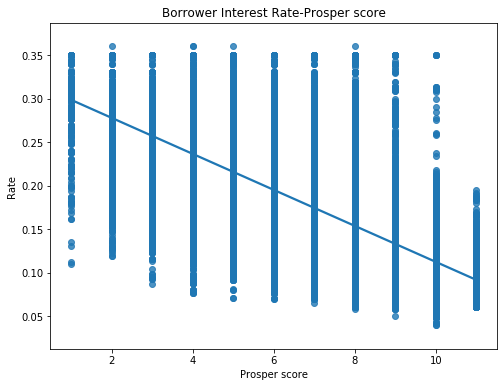

In [20]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan, x = 'ProsperScore', y ='BorrowerRate')
plt.xlabel('Prosper score')
plt.ylabel('Rate')
plt.title('Borrower Interest Rate-Prosper score');

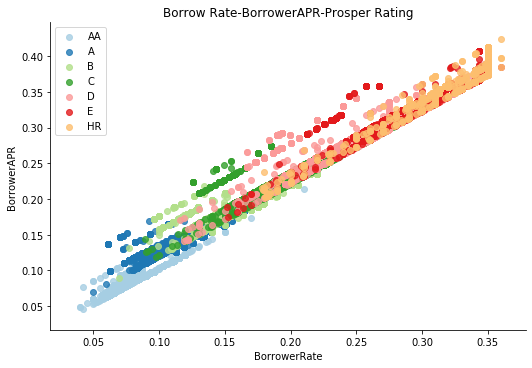

In [35]:
x = sns.FacetGrid(data = loan, hue = 'ProsperRating_Alpha', hue_order = ['AA','A','B','C','D','E','HR'], height = 5, aspect =1.5, palette="Paired")
x.map(sns.regplot,"BorrowerRate","BorrowerAPR", fit_reg = False);
plt.legend(fontsize = 10)
plt.title("Borrow Rate-BorrowerAPR-Prosper Rating");

#### Conclusion:
- Borrower Interest Rate and Prosper score are negatively correlated to each other.Similarly BorrowerAPR and Prosper score are also negatively correlated to each other.High prosper rating has lesser Borrower rate and lesser borrower APR.
-  Borrowers with high prosper score get loan at lower interest rate and lower APR and those with lesser prosper score need to pay a higher interest rate and higher APR.
- Therefore borrowers with higher income get loans easily and at a less interest rate and lesser APR whereas  borrowers with low income face difficulty in getting loans and need to pay a higher interest rate and higher APR.

### Question : Is there any relation between Prosper score and Employment status?

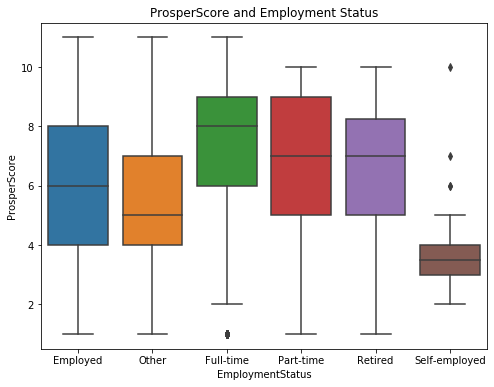

In [15]:
loan_df= loan[loan['IncomeRange'] != 'Not employed']
plt.figure(figsize = [8, 6])
sns.boxplot(data = loan_df, x = 'EmploymentStatus', y = 'ProsperScore');
plt.title('ProsperScore and Employment Status');

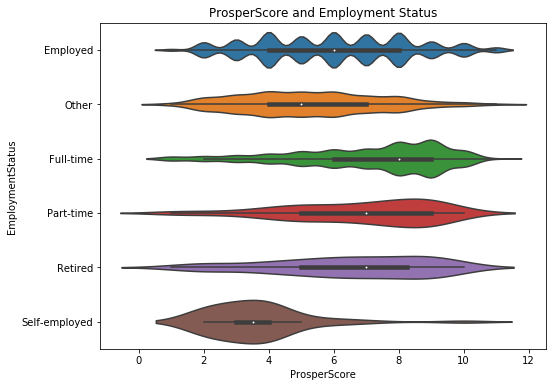

In [16]:
plt.figure(figsize = [8, 6])
sns.violinplot(data = loan_df, y = 'EmploymentStatus', x = 'ProsperScore')
plt.title('ProsperScore and Employment Status');

#### Conclusion:
- Self employed have least prosper rating with some outliners present. Full time, part time and retired have high prosper rating.Full time employees gets loan easily whereas self-employed do not get loan easily.
- So full time employees get loan at a lesser interest rate ,lesser APR and more easily as compared to others.Self-employed have to pay a high interest rate,high APR and face difficulty in getting a loan.

### Question: Is there any impact of loan amount on prosper score?

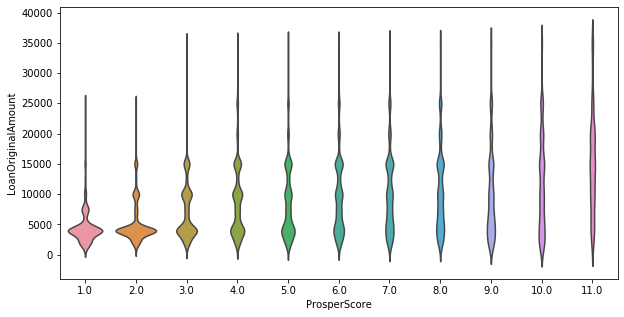

In [17]:
plt.figure(figsize=[10,5])
sns.violinplot(data=loan, x='ProsperScore', y='LoanOriginalAmount',inner= None);

#### Conclusion:
- Borrowers with less prosper score have lesser loan amount than those with higher prosper score.
- It's easier to get high amount loan for borrowers with high prosper score.
- Borrowers with higher income get loans of higher amount easily and those with lesser income do not get high amount loans easily.

### Question: How is Loan Original amount and borrower Interest rate related?

In [18]:
loan[["LoanOriginalAmount","BorrowerRate"]].corr()

,LoanOriginalAmount,BorrowerRate
LoanOriginalAmount,1.00000,-0.40686
BorrowerRate,-0.40686,1.00000


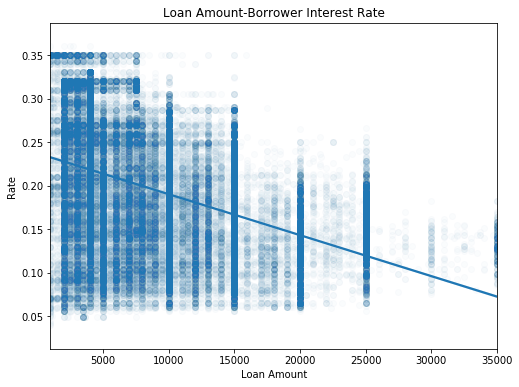

In [22]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan, x = 'LoanOriginalAmount', y ="BorrowerRate",scatter_kws = {'alpha' : 1/50})
plt.xlabel('Loan Amount')
plt.ylabel('Rate')
plt.title('Loan Amount-Borrower Interest Rate');

#### Conclusion:
- Loan Amount andBorrower Interest Rate are negatively correlated to each other.
- Loans with larger amount are provided at lesser interest rate and those with lesser amount are provided at higher interest rate.


## Key Insights:

- Higher income earning borrowers have high propsper score and thereby they can get loan easily, whereas borrowers having income <=49,999 have low prosper score and do not get loan easily.
- Borrower Interest Rate and Prosper score are negatively correlated to each other.Similarly BorrowerAPR and Prosper score are also negatively correlated to each other.High prosper rating has lesser Borrower rate and lesser borrower APR.Borrowers with high prosper score get loan at lower interest rate and lower APR and those with lesser prosper score need to pay a higher interest rate and higher APR.
- Therefore borrowers with higher income get loans easily and at a less interest rate and lesser APR whereas borrowers with low income face difficulty in getting loans and need to pay a higher interest rate and higher APR.
- Self employed have least prosper rating with some outliners present. Full time, part time and retired have high prosper rating.Full time employees gets loan easily whereas self-employed do not get loan easily.


- So full time employees get loan at a lesser interest rate ,lesser APR and more easily as compared to others.Self-employed have to pay a high interest rate,high APR and face difficulty in getting a loan.
- Borrowers with less prosper score have lesser loan amount than those with higher prosper score.It's easier to get high amount loan for borrowers with high prosper score.
- Borrowers with higher income get loans of higher amount easily and those with lesser income do not get high amount loans easily.
- Loan Amount andBorrower Interest Rate are negatively correlated to each other.Loans with larger amount are provided at lesser interest rate and those with lesser amount are provided at higher interest rate.
